## Implementing K Nearest Neighbors

In [52]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors,datasets
from sklearn.cross_validation import train_test_split

In [84]:
#Loading the Default Iris dataset
iris= datasets.load_iris()
print('X shape is {}'.format(iris.data.shape))
print('y shape is {}'.format(iris.target.shape))


X shape is (150, 4)
y shape is (150,)


In [53]:
#Splitting the Dataset into Test and Train sets
X = iris.data
y = iris.target
Xtr,Xtest,ytr,ytest = train_test_split(X,y,test_size=0.33,random_state=18)

In [88]:
class NearestNeighbour():
    def __init__(self):
        pass
    
    def train(self,Xtr,ytr):
        """Xtr is N x D where each row is an example whereas y is 1-dimension of size N"""
        #nearest neighbor simply remembers all the classification data
        self.Xtr=Xtr
        self.ytr=ytr
    
    def predict(self,Xtest,k=1):
        """Xtest is N x D where each row is an example for which we wish to predict label for"""
        num_test=Xtest.shape[0]
        ypred=np.zeros(num_test,dtype=self.ytr.dtype)
        
        #Raise an exception if K is very large
        if k>len(self.Xtr) or k<=0:
            raise ValueError
            
        #loop over all the test rows
        for i in range(num_test):
            distances=np.sqrt(np.sum(np.square(Xtr-Xtest[i,:]),axis=1))
            k_smallest_indices=distances.argsort()[:k]
            target=self.ytr[k_smallest_indices]
            ypred[i]=Counter(target).most_common()[0][0]
        return ypred

In [90]:
nn=NearestNeighbour()  # create a Nearest Neighbor classifier class
nn.train(Xtr,ytr)      # train the classifier on the training data
predicted=nn.predict(Xtest,k=10) # predict labels on the test data
print('Accuracy obtained is {}'.format(np.mean(predicted==ytest)))

Accuracy obtained is 0.98


## Parameter Tuning With Cross Validation

In [93]:
#Importing the KNN Clasifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [133]:
#creating odd list of K for KNN
myList = list(range(50))

#subsetting just the odd k
neighbors = list(filter(lambda x: x % 2 != 0, myList))
#Creating an empty list that will hold cv scores
cv_scores=[]

#performing 10 fold cross validation
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

Optimal_k value is given by 13


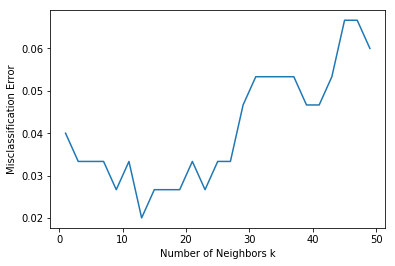

In [136]:
#Calculating the Misclassification Error
MSE =[1 - x for x in cv_scores]

#Finding Optimal K
optimal_k=neighbors[MSE.index(min(MSE))]
print("Optimal_k value is given by {}".format(optimal_k))

#Plotting MSE vs K
plt.plot(list(neighbors),MSE)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Misclassification Error')
plt.show()

## KNN Decision Boundary

In [138]:
#Todo